# The Solow Model with Human Capital

Imports and set magics:

In [118]:
import numpy as np
from scipy import optimize
import sympy as sm
from scipy import linalg
from types import SimpleNamespace
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets 
from IPython.display import display


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# We import our own code from the ModelProject.py file
from modelprojectT import SolowModelClass 
#We import our model
model = SolowModelClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

The "base-line" model that we will look at, will be an extended solow model, the solow model with human capital. 

In the solow model with human capital, there is an inclusion of human capital in the production function and accumulation of human capital by consumers. * 
 

The solow model shows ....

This project will look at the variation with human capital and how the implemtation of human capital affects the growth. Firstly it will be assumed that the human capitala is equal to the countrys population and later we will change this by making the human capital a part of the total population. Finally, we wil see how the parameters $ \alpha$ , $ \phi$ and $\delta$ will affect the growth




. * "Introducing Advanced Macroeconomics, by H.J.Whitta-Jacobsen and P.B.Sørensen"

The Solow-model with Human capital is given as below, by the book "Introducing Advanced Macroeconomics, by H.J.Whitta- Jacobsen and P.B.Sørensen"


$$
Y_{t} = K_{t}^{\alpha} H_{t}^{\phi} (A_{t} L_{t})^{1-\alpha -\phi}
$$

$$
r_{t} = \alpha \left( \frac{K_{t}}{A_{t} L_{t}} \right)^{\alpha -1} \left(\frac{H_{t}}{A_{t} L_{t}}\right)^{\phi}
$$

$$
w{_t} = ( 1 - \alpha) \left( \frac{K_{t}}{A_{t} L_{t}} \right)^{\alpha} \left(\frac{H_{t}}{A_{t} L_{t}}\right)^{\phi} A_{t}
$$

$$
K_{t+1} - K_{t} = s_{K} Y_{t} - \delta K_{t}
$$

$$ 
H_{t+1} - H_{t} = s_{H} Y_{t} - \delta H_{t}
$$


$$
L_{t+1} = (1 + n) L_{t}
$$

$$
A_{t+1} = (1 + g) A_{t}
$$ 

We can now compute the variables as per effective worker variables: 
$$
\tilde{y_{t}}= \tilde{k_{t}}^{\alpha} \tilde{h_{t}}^{\phi} 
$$
$$
\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)} \left( s_{K} \tilde{y_{t}} + (1-\delta) \tilde{k_{t}} \right)
$$
$$ 
\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)} \left( s_{H} \tilde{y_{t}} + (1-\delta) \tilde{h_{t}} \right)
$$

The transition-equations can be found by substituting for y in the two latter equations

## Analytical solution

We will start by calculating the steady state values for $ h^* $ and $ k^*$

In [114]:
# We start by naming our variables 
k = sm.symbols('k')
h = sm.symbols('h')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')
g = sm.symbols('g')
n = sm.symbols('n')
phi = sm.symbols('phi')

y =  k**alpha * h**phi

# We define the function for which we are calculating the ss-value 
ss_k = sm.Eq(k, 1/((1+n)*(1+g))*((s_K)*y+(1-delta)*k)) 
# We find the steady state for k, by putting the lef hand side equal to 0
kss = sm.solve(ss_k,k)[0]
        
# We will now do the same for h
ss_h = sm.Eq(h, 1/((1+n)*(1+g)) * ((s_H)*y+(1-delta)*h) ) 
hss = sm.solve(ss_h,h)[0]

## print('We now have these two values', 'k*=', kss , 'and h*=' , hss)

## print('We now need to substitute to find the real steady state values')

# We will now do the substitution for h in kss and solve for k
k_ss = kss.subs(h,hss)
k_ss 

# now we do the substitution for k i hss and solve for h
h_ss = hss.subs(k,kss)
h_ss

print('k_ss = ' , sm.latex(k_ss) ,'h_ss = ' , sm.latex(h_ss))
##print ('We now have the steady State values for h and k' , k_ss , h_ss)
        

k_ss =  \left(\frac{\left(\delta + g n + g + n\right) \left(\left(\frac{k^{- \alpha} \left(\delta + g n + g + n\right)}{s_{H}}\right)^{\frac{1}{\phi - 1}}\right)^{- \phi}}{s_{K}}\right)^{\frac{1}{\alpha - 1}} h_ss =  \left(\frac{\left(\delta + g n + g + n\right) \left(\left(\frac{h^{- \phi} \left(\delta + g n + g + n\right)}{s_{K}}\right)^{\frac{1}{\alpha - 1}}\right)^{- \alpha}}{s_{H}}\right)^{\frac{1}{\phi - 1}}


We can now write this more readable:
$$
k^* =  \left(\frac{\left(\delta + g n + g + n\right) \left(\left(\frac{k^{- \alpha} \left(\delta + g n + g + n\right)}{s_{H}}\right)^{\frac{1}{\phi - 1}}\right)^{- \phi}}{s_{K}}\right)^{\frac{1}{\alpha - 1}} 
$$
$$
h^* =  \left(\frac{\left(\delta + g n + g + n\right) \left(\left(\frac{h^{- \phi} \left(\delta + g n + g + n\right)}{s_{K}}\right)^{\frac{1}{\alpha - 1}}\right)^{- \alpha}}{s_{H}}\right)^{\frac{1}{\phi - 1}}
$$

We can write these two expressions a bit nicer

$$
\tilde{k}^* = \left( \frac { s_K ^{1-\phi}  s_H^\phi} { n+ g + \delta + ng } \right) ^\frac{1}{1-\phi - \alpha}
$$
$$
\tilde{h}^* = \left( \frac { s_K ^\alpha  s_H^{1-\alpha}} { n+ g + \delta + ng } \right) ^\frac{1}{1-\phi - \alpha}
$$

Test for the module from the .py file

In [125]:
# We define the emperical values for our parameters
par = model.par
par.alpha = 0.333
par.phi = 0.333
par.delta = 0.02
par.n = 0.014
par.g = 0.016
par.s_K = 0.25
par.s_H = 0.129



In [126]:

#model.SteadyState(do_print=True)
from scipy.optimize import fsolve
model.SteadyState2()

Steady state values:
k* = 63.1571
h* = 32.5891


(63.15712297843104, 32.58907545687043)

In [135]:
from modelprojectT import SolowModelClass
model = SolowModelClass()
model.SteadyState2(do_print=True)

Steady state values:
k* = 63.1571
h* = 32.5891


(63.15712297843104, 32.58907545687043)

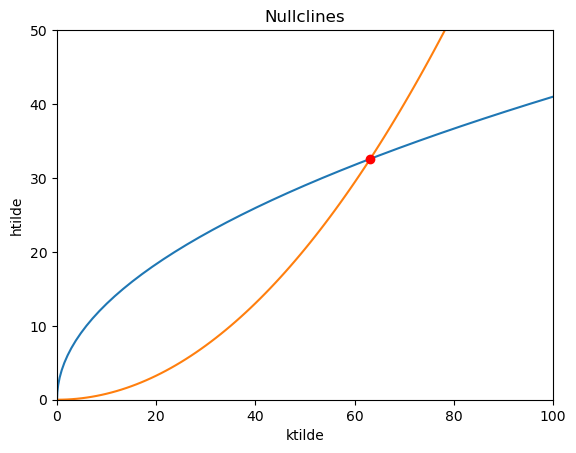

In [141]:
from modelprojectT import SolowModelClass
model = SolowModelClass()
model.sim.phi = 0.333

htildevalues, ktildevalues = model.calculate_values(periods=100)

k_ss, h_ss = model.SteadyState2()

dummy = range(100)

plt.plot(ktildevalues, dummy)
plt.plot(dummy, htildevalues)
plt.xlim(0,100)
plt.ylim(0,50)
plt.xlabel('ktilde')
plt.ylabel('htilde')
plt.title('Nullclines')
plt.plot(k_ss, h_ss, 'ro', label='Steady State')
plt.show()





If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

1. Find Steady State
2. Compute the null-clines

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

1. Human Capital is a part of the populaiton - Interactive diagram?

$$
L_{t} = \lambda N_{t}
$$  
where $ 0< \lambda < 1 $

$$
N_{t+1} = (1 + n) N_{t} 
$$

2. How changes in alpha, phi and delta affect the growth - interactive diagram. 

# Conclusion

Add concise conclusion. 

In [ ]:
production = model.ProductionFunction()

